### <b> Trabalho Final - Inteligência Computacional Aplicada (TIP7077) </b>
#### <b> Aluno: Carlos Eduardo Sousa Lima </b>
#### <b> Prof. Guilherme de Alencar Barreto </b>
***

#### <b>Questão 02 - Regressão e Ajuste de Curvas - *Real estate valuation dataset* </b>

The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples). (https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set)

In [2]:
#Bibliotecas Utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
data = pd.read_excel("Real estate valuation data set.xlsx", index_col = 0)

X = data.iloc[:, 0:6].to_numpy()
Y = data.iloc[:, -1].to_numpy()

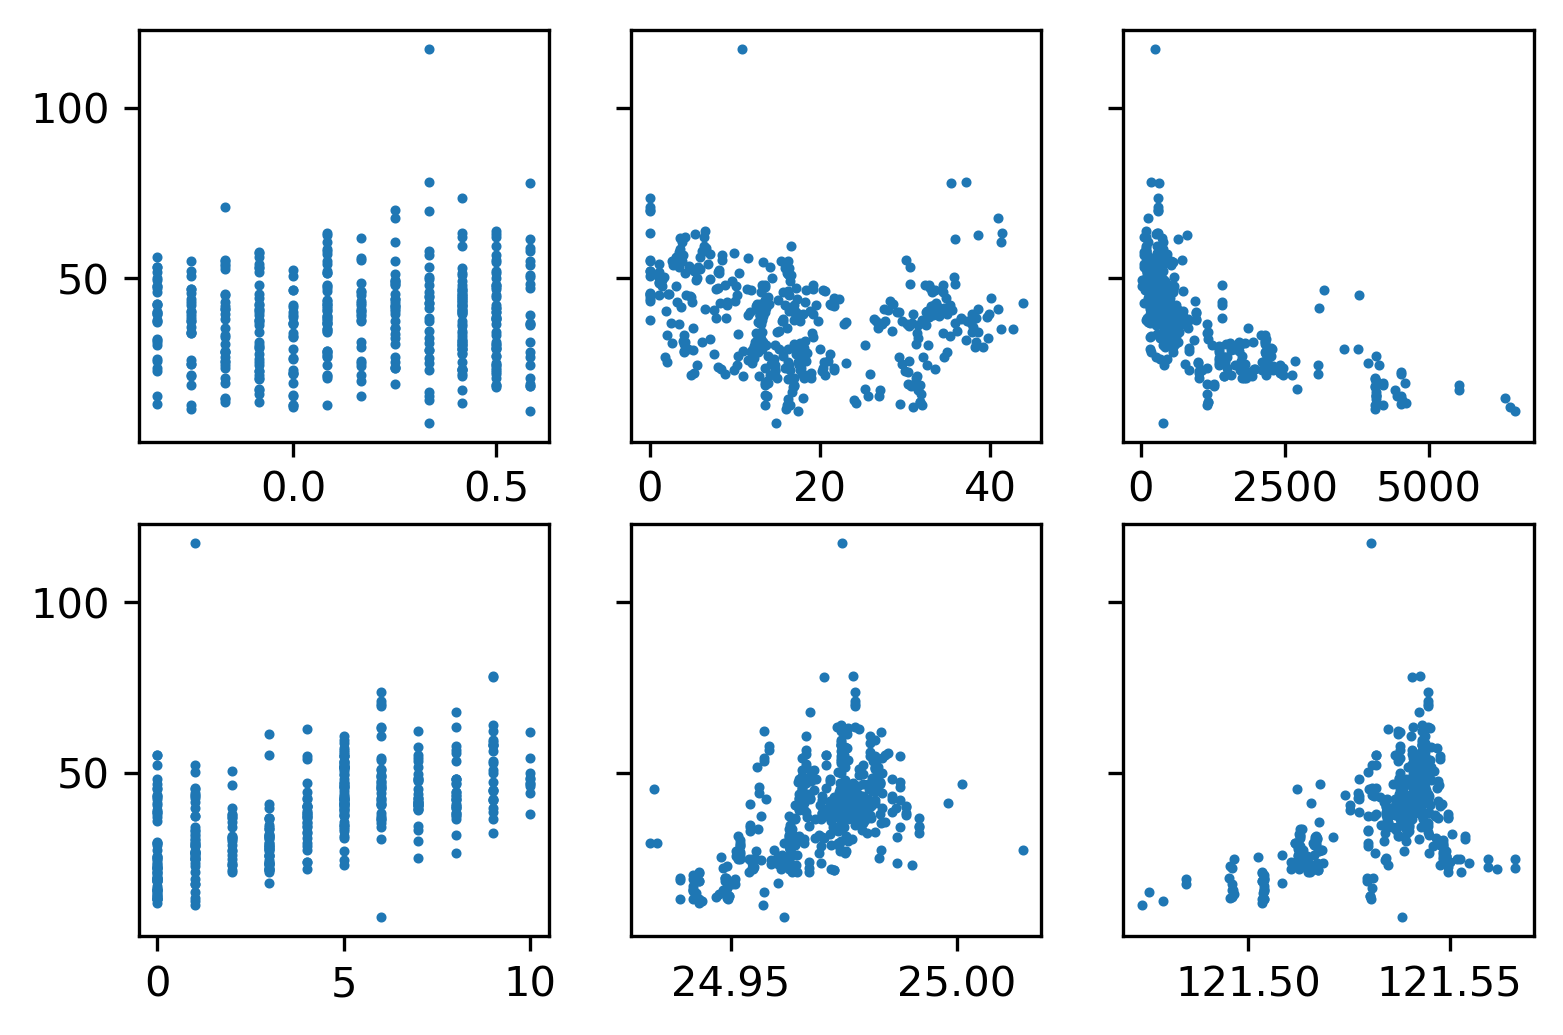

In [37]:
fig, axs = plt.subplots(2,3, dpi = 300, sharey = True)
axs[0,0].scatter(X[:,0], Y, s = 2)
axs[0,1].scatter(X[:,1], Y, s = 2)
axs[0,2].scatter(X[:,2], Y, s =2)
axs[1,0].scatter(X[:,3], Y, s = 2)
axs[1,1].scatter(X[:,4], Y, s = 2)
axs[1,2].scatter(X[:,5], Y, s = 2)


In [47]:
cov_matrix = np.cov(X.T)
df_cov = pd.DataFrame(cov_matrix, columns = ["X1","X2","X3","X4","X5","X6"], index = ["X1","X2","X3","X4","X5","X6"])
df_cov

,X1,X2,X3,X4,X5,X6
X1,0.079521,0.056357,2.166777e+01,0.007928,0.000123,-0.000178
X2,0.056357,129.788704,3.684082e+02,1.664189,0.007694,-0.008483
X3,21.667774,368.408249,1.592921e+06,-2239.938319,-9.257892,-15.618216
X4,0.007928,1.664189,-2.239938e+03,8.676334,0.016236,0.020302
X5,0.000123,0.007694,-9.257892e+00,0.016236,0.000154,0.000079
X6,-0.000178,-0.008483,-1.561822e+01,0.020302,0.000079,0.000236


##### Regressão Linear Múltipla de Mínimos Quadrados

In [203]:
def R2(y_true, y_pred, n, p):

    coef = 1 - (np.power(y_true-y_pred,2).sum()/np.power(y_true-y_true.mean(),2).sum())
    coef_aj = 1 - (1-coef)*((n-1)/(n-p))
    # coef_aj = 1 - ((n-1)/(n-p)) * (1-coef)
    return (coef, coef_aj)

def RMSE(y_true, y_pred):

    coef = np.power((np.power(y_true - y_pred, 2).sum())/y_true.shape[0], 0.5)

    return coef

def std_data(x):

    std_x = (x - x.mean(axis = 0, keepdims = True))/x.std(axis = 0, keepdims = True, ddof = 1)

    return std_x

data = pd.read_excel("Real estate valuation data set.xlsx", index_col = 0)

X = data.iloc[:, 0:6].to_numpy()

Y = data.iloc[:, -1].to_numpy()
X = std_data(X)
Y = std_data(Y)
# rand_index = np.random.permutation(X.shape[0])
# X = X[rand_index,:]
# Y = Y[rand_index]

spt_point = int(2/3*X.shape[0])
X_train = X[:spt_point,:]
Y_train = Y[:spt_point]

X_test = X[spt_point:,:]
Y_test = Y[spt_point:]

#All dataset
X = np.c_[np.ones(X.shape[0]), X]
M = np.linalg.lstsq(X, Y, rcond = -1)[0]

Y_pred = np.dot(X, M)

print("R2 = {:.3f}".format(R2(Y, Y_pred, X.shape[0], X.shape[1])[0]))
print("R2 ajustado = {:.3f}".format(R2(Y, Y_pred, X.shape[0], X.shape[1])[1]))
print("RMSE = {:.3f}".format(RMSE(Y, Y_pred)))

#Comparative Case

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
M_train = np.linalg.lstsq(X_train, Y_train, rcond = -1)[0]

Y_train_pred = np.dot(X_train, M_train)

print("R2 = {:.3f}".format(R2(Y_train, Y_train_pred, X_train.shape[0], X_train.shape[1])[0]))
print("R2 ajustado = {:.3f}".format(R2(Y_train, Y_train_pred, X_train.shape[0], X_train.shape[1])[1]))
print("RMSE = {:.3f}".format(RMSE(Y_train, Y_train_pred)))
#Targete Case

X_test = np.c_[np.ones(X_test.shape[0]), X_test]
M_test = np.linalg.lstsq(X_test, Y_test, rcond = -1)[0]

Y_test_pred = np.dot(X_test, M_test)

print("R2 = {:.3f}".format(R2(Y_test, Y_test_pred, X_test.shape[0], X_test.shape[1])[0]))
print("R2 ajustado = {:.3f}".format(R2(Y_test, Y_test_pred, X_test.shape[0], X_test.shape[1])[1]))
print("RMSE = {:.3f}".format(RMSE(Y_test, Y_test_pred)))

R2 = 0.582
R2 ajustado = 0.576
RMSE = 0.645
R2 = 0.580
R2 ajustado = 0.571
RMSE = 0.672
R2 = 0.607
R2 ajustado = 0.589
RMSE = 0.575


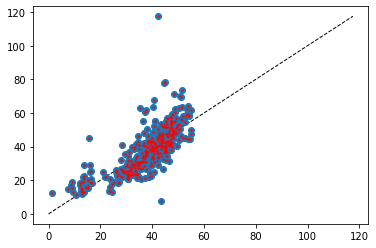

In [97]:
fig, ax = plt.subplots()
ax.scatter(Y_mod, Y, zorder = 2)
ax.scatter(Y_m, Y, zorder = 2, s = 1.5, c = "red")
ax.plot(np.linspace(0, Y.max()), np.linspace(0, Y.max()), c = "black", lw = 1, ls = "--", zorder = 1)

##### Extreme Learning Machine

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def act_fun(u, fun):

    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0

    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
    
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
    
    return u 

def norm_data(x):

    for i in range(x.shape[1]):
        x[:,i] = x[:,i]/x[:,i].max()
        
    #x_norm = 2*((x - x.min())/(x.max() - x.min()) - 1
    return x

def R2(y_true, y_pred, n, p):

    coef = 1 - (np.power(y_true-y_pred,2).sum()/np.power(y_true-y_true.mean(),2).sum())
    coef_aj = 1 - (1-coef)*((n-1)/(n-p))
    # coef_aj = 1 - ((n-1)/(n-p)) * (1-coef)
    return (coef, coef_aj)

def RMSE(y_true, y_pred):

    coef = np.power((np.power(y_true - y_pred, 2).sum())/y_true.shape[0], 0.5)

    return coef
data = pd.read_excel("Real estate valuation data set.xlsx", index_col = 0)

X = data.iloc[:, 0:6].to_numpy()

Y = data.iloc[:, -1].to_numpy()

X = norm_data(X)
Y = norm_data(np.expand_dims(Y,1))

fun_type = "log"
Nr = 10
q = 5
# eta = 0.6
# Ne = 1500
RMSE_r = []
R2_r = []
R2aj_r = []
for r in range(Nr):
    rand_index = np.random.permutation(X.shape[0])

    X = X[rand_index,:]
    Y = Y[rand_index]

    spt_point = int(2/3*X.shape[0])
    X_train = X[:spt_point,:]
    Y_train = Y[:spt_point]

    X_test = X[spt_point:,:]
    Y_test = Y[spt_point:]

    W = np.random.normal(loc = 0, scale = 0.1, size = (q, X.shape[1]+1))

    Z = []

    for i in range(X_train.shape[0]):
        x = np.append(-1, X_train[i,:])
        U = np.dot(W, x)
        z = act_fun(U, fun_type)
        z = np.append(-1, z)
        Z.append(z)
    Z = np.array(Z)
    M = np.dot(np.linalg.pinv(Z), Y_train)

    count = 0
    y_pred = []
    EQM = 0
    for j in range(X_test.shape[0]):
        x = np.append(-1, X_test[j,:])
        U1 = np.dot(W, x)
        z = act_fun(U1, fun_type)
        z = np.append(-1, z)
        y = np.dot(z, M)
        y_pred.append(y)
        EQM = EQM + 0.5*sum(np.power(Y_test[j] - y_pred,2))
    y_pred = np.array(y_pred)

    RMSE_r.append(np.power(EQM, 0.5)[0])
    R2_r.append(R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[0])
    R2aj_r.append(R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[1])
    print("Rodada: {}, R2 = {:.3f}".format(r+1, R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[0]))
    print("Rodada: {}, R2_aj = {:.3f}".format(r+1, R2(Y_test, y_pred, X_test.shape[0], X_test.shape[1])[0]))
    print("Rodada: {}, RMSE = {:.3f}".format(r+1, np.power(EQM,0.5)[0]))

print("\n###### Resumo {} Rodadas ######".format(Nr))
print("R2: Média = {:.3f}, Desv. Pad. = {:.3f}, Máximo = {:.3f}, Mínimo = {:.3f}".format(
    np.mean(R2_r), np.std(R2_r), np.max(R2_r), np.min(R2_r)))
print("R2_aj: Média = {:.3f}, Desv. Pad. = {:.3f}, Máximo = {:.3f}, Mínimo = {:.3f}".format(
    np.mean(R2aj_r), np.std(R2aj_r), np.max(R2aj_r), np.min(R2aj_r)))
print("RMSE: Média = {:.3f}, Desv. Pad. = {:.3f}, Máximo = {:.3f}, Mínimo = {:.3f}".format(
    np.mean(RMSE_r), np.std(RMSE_r), np.max(RMSE_r), np.min(RMSE_r)))

Rodada: 1, R2 = 0.596
Rodada: 1, R2_aj = 0.596
Rodada: 1, RMSE = 9.067
Rodada: 2, R2 = 0.564
Rodada: 2, R2_aj = 0.564
Rodada: 2, RMSE = 8.858
Rodada: 3, R2 = 0.653
Rodada: 3, R2_aj = 0.653
Rodada: 3, RMSE = 10.855
Rodada: 4, R2 = 0.514
Rodada: 4, R2_aj = 0.514
Rodada: 4, RMSE = 8.654
Rodada: 5, R2 = 0.669
Rodada: 5, R2_aj = 0.669
Rodada: 5, RMSE = 10.081
Rodada: 6, R2 = 0.606
Rodada: 6, R2_aj = 0.606
Rodada: 6, RMSE = 9.995
Rodada: 7, R2 = 0.600
Rodada: 7, R2_aj = 0.600
Rodada: 7, RMSE = 9.559
Rodada: 8, R2 = 0.465
Rodada: 8, R2_aj = 0.465
Rodada: 8, RMSE = 9.903
Rodada: 9, R2 = 0.452
Rodada: 9, R2_aj = 0.452
Rodada: 9, RMSE = 10.234
Rodada: 10, R2 = 0.621
Rodada: 10, R2_aj = 0.621
Rodada: 10, RMSE = 10.369

###### Resumo 10 Rodadas ######
R2: Média = 0.574, Desv. Pad. = 0.071, Máximo = 0.669, Mínimo = 0.452
R2_aj: Média = 0.558, Desv. Pad. = 0.073, Máximo = 0.657, Mínimo = 0.432
RMSE: Média = 9.758, Desv. Pad. = 0.673, Máximo = 10.855, Mínimo = 8.654


In [28]:
a = np.array(R2aj_r)
print(a.mean())
print(np.mean(R2aj_r))

0.5476358352060885
0.5476358352060885


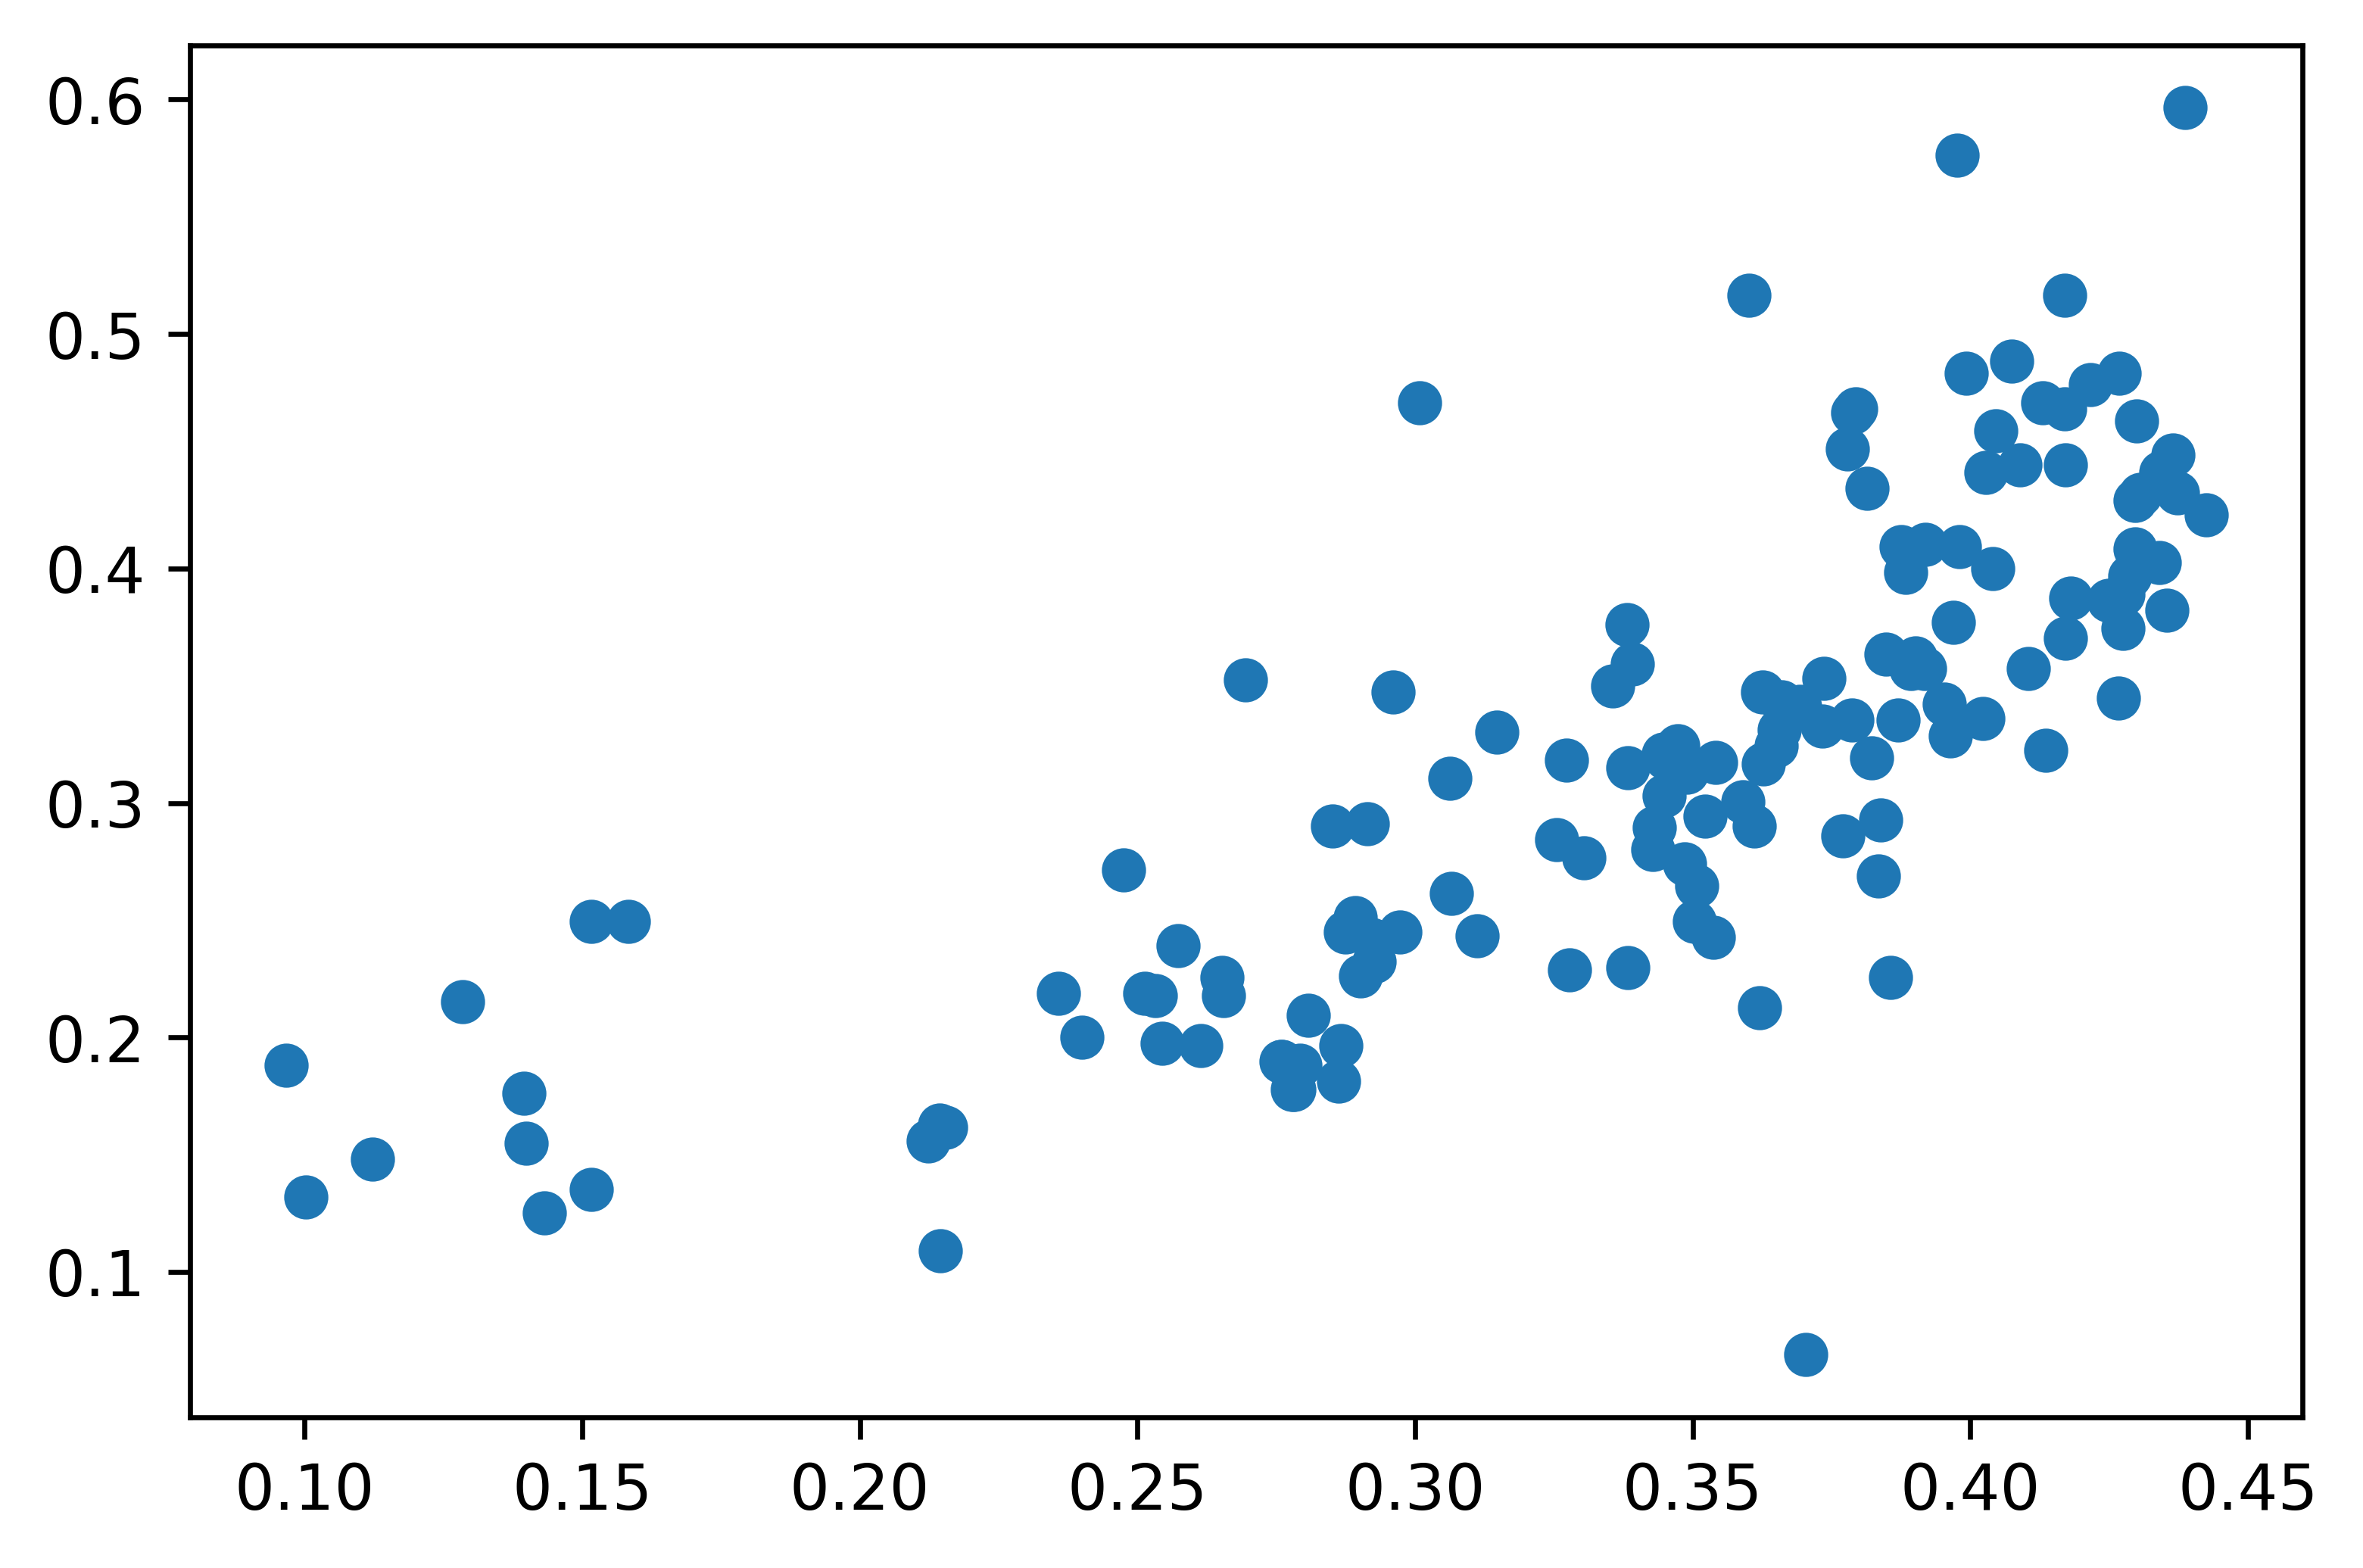

In [232]:
fig, ax = plt.subplots(dpi = 600)
ax.scatter(y_pred, Y_test)

##### MLP

q = 5, eta = 0.6, 76.1%

In [154]:
from collections import namedtuple
import time
def act_fun(u, fun):
    action_fun = namedtuple("act_fun", ["f", "df"])
    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0
        du = np.nan
    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
        du = 0.5*(1-np.power(u,2)) + 0.05
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)), dtype = "float")
        du = u*(1-u) + 0.05
    return (action_fun(f = u, df = du))

def norm_data(x):

    for i in range(x.shape[1]):
        x[:,i] = x[:,i]/x[:,i].max()
        # x[:,i] = 2*((x[:,i] - x[:,i].min())/(x[:,i].max() - x[:,i].min())) - 1
        #x_norm = 2*((x - x.min())/(x.max() - x.min()) - 1
    return x

def R2(y_true, y_pred, n, p):

    coef = 1 - (np.power(y_true-y_pred,2).sum()/np.power(y_true-y_true.mean(),2).sum())
    coef_aj = 1 - (1-coef)*((n-1)/(n-p))
    # coef_aj = 1 - ((n-1)/(n-p)) * (1-coef)
    return (coef, coef_aj)

def RMSE(y_true, y_pred):

    coef = np.power((np.power(y_true - y_pred, 2).sum())/y_true.shape[0], 0.5)

    return coef

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod

data = pd.read_excel("Real estate valuation data set.xlsx", index_col = 0)

X = data.iloc[:, 0:6].to_numpy()

Y = data.iloc[:, -1].to_numpy()

X = norm_data(X)
Y = norm_data(np.expand_dims(Y,1))

fun_type = "log"
Nr = 1
q = 5
eta = 0.06
Ne = 1500
mon = 0.75

tic = time.perf_counter()
EQM_train_r = []
EQM_test_r = []
for r in range(Nr):
    rand_index = np.random.permutation(X.shape[0])

    X = X[rand_index,:]
    Y = Y[rand_index]

    spt_point = int(2/3*X.shape[0])
    X_train = X[:spt_point,:]
    Y_train = Y[:spt_point]

    X_test = X[spt_point:,:]
    Y_test = Y[spt_point:]

    W = {
        0: np.random.rand(q, X_train.shape[1]+1)*0.01,
        1: np.random.rand(Y_train.shape[1], q+1)*0.01
    }
    W_old = W.copy()
    EQM_train = []
    for e in range(Ne):
        rand_index = np.random.permutation(X_train.shape[0])
        X_train = X_train[rand_index,:]
        Y_train = Y_train[rand_index,:]
        
        EQM = 0

        for i in range(X_train.shape[0]):
            x = np.append(-1, X_train[i,:])
            U1 = np.dot(W[0], x)
            z, dz = act_fun(U1, fun_type)
            z = np.append(-1, z)
            U2 = np.dot(W[1], z)
            y, dy = act_fun(U2, fun_type)

            err = Y_train[i,:] - y
            EQM = EQM + np.power(err,2).sum()
            
            err = np.expand_dims(Hardamad_Prod(err, dy), 1)
            x = np.expand_dims(x,1)
            z = np.expand_dims(z,1)

            DDi = Hardamad_Prod(dz, np.dot(W[1][:,1:].T, err))

            W[0] = W[0] + eta*np.dot(DDi, x.T) + mon*(W[0] - W_old[0])
            # print(W[1].shape)
            W[1] = W[1] + eta*np.dot(err, z.T) + mon*(W[1] - W_old[1])
            # print(W[1].shape)
            W_old = W.copy()

        EQM_train.append(EQM)
    EQM_train_r.append(EQM_train)

    EQM_test = 0
    count_20 = 0
    count_10 = 0
    y_pred = []
    for j in range(X_test.shape[0]):
        x = np.append(-1, X[j,:])
        U1 = np.dot(W[0],x)
        z = act_fun(U1, fun_type).f
        z = np.append(-1, z)
        U2 = np.dot(W[1], z)
        y = act_fun(U2, fun_type).f
        err = Y_test[j,:] - y
        EQM_test = EQM_test + np.power(err,2).sum()
        if np.abs(err) <= 0.2*np.abs(Y_test[j,:]):
            count_20 += 1
        if np.abs(err) <= 0.2*np.abs(Y_test[j,:]):
            count_10 += 1
        y_pred.append(y)
    EQM_test_r.append(EQM_test)

    print("Rodada {} - Taxa de acerto para uma taxa de erro admssível de 20% = {:.2%}".format(r+1, count_20/X_test.shape[0]))
    print("Rodada {} - Taxa de acerto para uma taxa de erro admssível de 10% = {:.2%}".format(r+1, count_10/X_test.shape[0]))
    print("Rodada {} - EQM última época de treino = {:.3f}, {} épocas".format(r+1, EQM_train[-1], Ne))
    print("Rodada {} - EQM teste = {:.3f}".format(r+1, EQM_test))
toc = time.perf_counter()
print("Tempo de Calibração e Validação = {:.3f}, Rodadas = {}, Épocas = {}".format(toc - tic, Nr, Ne))


Rodada 1 - Taxa de acerto para uma taxa de erro admssível de 20% = 19.57%
Rodada 1 - Taxa de acerto para uma taxa de erro admssível de 10% = 19.57%
Rodada 1 - EQM última época de treino = 6.250, 1500 épocas
Rodada 1 - EQM teste = 13.722
Tempo de Calibração e Validação = 150.250, Rodadas = 1, Épocas = 1500


1.0

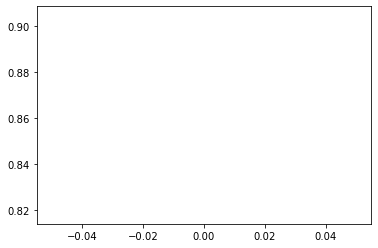

In [138]:
fig, ax = plt.subplots()
ax.plot(EQM_test)